In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
import sys

In [76]:
# loading dataset

url = "https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv"
download = requests.get(url).content

covid_df = pd.read_csv(io.StringIO(download.decode('utf-8')))
covid_df = covid_df.set_index('Sno')
covid_df

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Sno,,,,,,
1,30/01/20,Kerala,1,0,0,0
2,31/01/20,Kerala,1,0,0,0
3,01/02/20,Kerala,2,0,0,0
4,02/02/20,Kerala,3,0,0,0
5,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...
266,21/03/20,Jammu and Kashmir,4,0,0,0
267,21/03/20,Ladakh,13,0,0,0
268,21/03/20,Uttar Pradesh,23,1,9,0


In [198]:
# group the data based on date

grouped_df = covid_df.drop(['State/UnionTerritory'],axis=1).groupby("Date", sort=False)
grouped_df = grouped_df.sum()
grouped_df.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0


In [90]:
# find total cases based on date

total_case = grouped_df.sum(axis=1).reset_index(name="Total Cases")
total_case

,Date,Total Cases
0,30/01/20,1
1,31/01/20,1
2,01/02/20,2
3,02/02/20,3
4,03/02/20,3
5,04/02/20,3
6,05/02/20,3
7,06/02/20,3
8,07/02/20,3
9,08/02/20,3


Text(0, 0.5, 'Covid Cases')

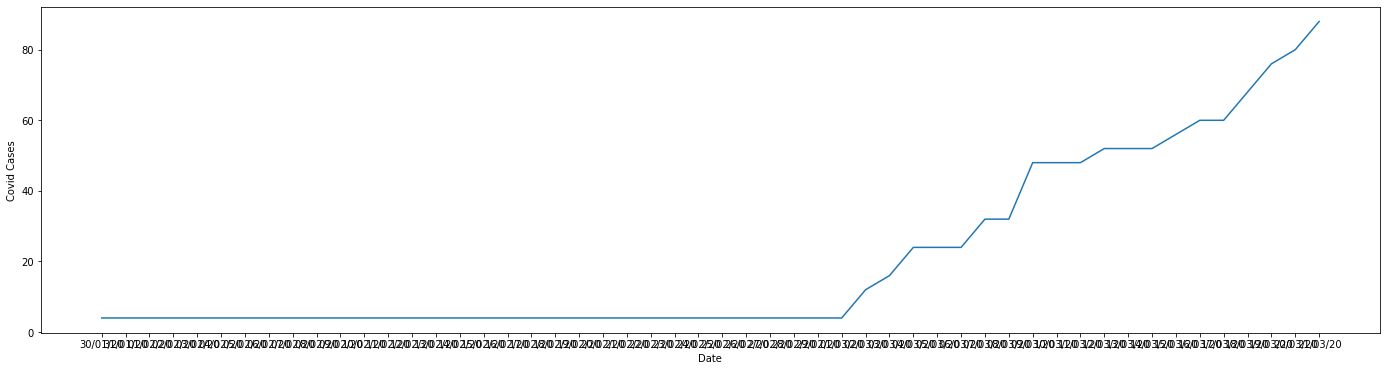

In [87]:
# visualization

plt.figure(figsize=(24,6))
plt.plot(total_case['Date'], total_case['Total Cases'])

plt.xlabel("Date")
plt.ylabel("Covid Cases")

In [ ]:
# calculating value of rate of increase

rates = []
for i in use_df.index[:-1]:
    r = (use_df['Total Cases'][i+1] - use_df['Total Cases'][i])/use_df['Total Cases'][i]
    rates.append(r)
    
avg_rate = sum(rates)/len(rates)
avg_rate

In [197]:
# calculating P_t i.e predicting the number of cases after 26 days of 4th march

import math   #for exponential function
P_o = 31      #total number of cases on 4th march
t = 26        #26 days

P_t = P_o * (math.exp(avg_rate * t))
P_t


1257.117590286531